# **Coursera Courses Dataset EDA 🧑‍🎓**

### 🎓 **Project Summary**

This project presents a comprehensive Exploratory Data Analysis (EDA) of a **Coursera Courses dataset** sourced from Kaggle. Coursera, a leading educational platform, offers courses from top global universities and business organizations, making this analysis highly valuable for various stakeholders, including potential learners, course providers, and online education researchers.

The analysis was executed using a Python script, using Pandas and NumPy for data cleaning and manipulation, and Matplotlib, Seaborn, and Plotly Express for detailed visualization and interactive insights.


#### **Key Findings and Stakeholder Insights**

The EDA provided valuable insights into the structure, quality, and popularity of the courses:

1. The dataset comprises **891 courses** from **154 organizations**.

- **Top Providers (by Course Count):** University of Pennsylvania (59), University of Michigan (41), Google Cloud (34), Duke University (28), and Johns Hopkins University (28).
- A significant **22%** of course organizations maintain a very high average rating of **4.8 or above**.

2. **Course Structure:** The dataset contains three primary certificate types ("Course," "Specialization," "Professional Certificate") and four difficulty levels ("Beginner," "Intermediate," "Mixed," "Advanced").

3. The **"Beginner"** difficulty level accounts for the largest proportion of courses across all certificate types.

4. Course ratings are generally high (spanning between 3.3 and 5.0), with the majority concentrated between **4.7 and 4.8**.
- Courses with rating below 4.3 are considered statistical outliers.

5. Entry-level courses (**"Mixed"** and **"Beginner"**) exhibit a slightly higher average rating than more advanced courses.

6. **Course Popularity (Enrollment):**
- Most courses have an enrolled student count below **222,5k**.
- There are **78 highly popular outliers**, including most popular: "Machine Learning" by Stanford University, "The Science of Well-Being" by Yale University, "Python for Everybody" and "Programming for Everybody (Getting Started with Python)" by University of Michigan, and "Data Science" by Johns Hopkins University.

7. **Top Providers (by Student Enrollment):** The most popular providers by total enrolled students are: the University of Michigan (7.4M), University of Pennsylvania (5.5M), Stanford University (4.9M), University of California, Irvine (4.3 mln), and Johns Hopkins University (4.3 mln).

8. **Popular Fields:** programming (Python, R), machine learning, data science, English language, and career development.

9. **Popular Type:** the most popular format by student count is the **"Course"** certificate type and the **"Beginner"** difficulty level.

10. **Quality vs. Popularity:** A Spearman correlation test confirmed that there is no statistically significant monotonic relationship between a course's rating and its number of enrolled students.
- This indicates that course popularity does not reliably predict quality, and vice versa.


#### 💻 **Technical Note**

This project is fully reproducible. To re-run all code cells, please ensure the original Coursera Courses dataset (.csv file) is downloaded from the Kaggle platform and uploaded to the Google Drive with the corresponding path updated in the setup code cell.

- Link to the dataset on [Kaggle](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset).

## **I. Data Cleaning & Initial Exploration**

* **Import all necessary libraries:**

In [1]:
from google.colab import drive

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter


pd.set_option('display.max_columns', 25)

* **Mount Google Drive and define the path to the .csv file:**

In [2]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/coursera_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* **Read and inspect the dataset:**

In [3]:
original_df = pd.read_csv(file_path, header=0)
print("Dataframe shape - number of rows and columns:")
print(original_df.shape)

Dataframe shape - number of rows and columns:
(891, 7)


* **Check names of all columns in the dataset:**

In [4]:
print("Initial Dataframe Columns:")
print(original_df.columns)

Initial Dataframe Columns:
Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')


* **Inspect dataframe to find any duplicated rows:**

In [5]:
duplicated_rows = original_df[original_df.duplicated(keep=False)]
print(duplicated_rows)

Empty DataFrame
Columns: [Unnamed: 0, course_title, course_organization, course_Certificate_type, course_rating, course_difficulty, course_students_enrolled]
Index: []


* Empty DataFrame means that there are no full duplicate rows.

* **Get dataframe info:**

In [6]:
print("Initial Dataframe Info:")
print(original_df.info())

Initial Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB
None


**Dataframe insights:**
- 'Unnamed: 0' column may be redundant.
- There are no rows with empty values in any of the columns.
- 'course_students_enrolled' dtype needs to be changed to int64.

* **Look at the first 10 rows of data:**

In [7]:
print("Initial Dataframe Head:")
original_df.head(10)

Initial Dataframe Head:


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


**Issues with dataset:**
- 'Unnamed: 0' column is redundant, having old indexes.
- Values of 'course_students_enrolled' column need to be fixed for further analysis.

* **Create a copy of initial dataframe to work with:**

In [8]:
df = original_df.copy()

* **Remove unnecessary column 'Unnamed: 0':**

In [9]:
df = df.drop(['Unnamed: 0'], axis=1)

* **Define the function to clean 'course_students_enrolled' column:**

In [10]:
def clean_course_students_enrolled(enrollment_str):

    if isinstance(enrollment_str, str):
        enrollment_str = enrollment_str.lower().strip()

        if 'k' in enrollment_str:
            return float(enrollment_str.replace('k', '')) * 1000

        elif 'm' in enrollment_str:
            return float(enrollment_str.replace('m', '')) * 1000000

        else:
            try:
                return float(enrollment_str)
            except ValueError:
                return 0.0
    return 0.0

* **Change 'course_students_enrolled' dtype to 'int64' to be able to perform calculations:**

In [11]:
df['course_students_enrolled'] = df['course_students_enrolled'].apply(clean_course_students_enrolled)
df['course_students_enrolled'] = df['course_students_enrolled'].astype('int64')

* **Check out the updated dataframe:**

In [12]:
df.head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2400
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61000
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12000


**Dataframe insights:**

- Redundant 'Untitled: 0' column was removed.
- Column 'course_students_enrolled' now has actual numbers as values.

* **Check for anomalies in "course_organization" column:**

In [13]:
df['course_organization'].value_counts()

,count
course_organization,
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Duke University,28
Johns Hopkins University,28
...,...
École des Ponts ParisTech,1
Tel Aviv University,1
The University of Hong Kong,1


**Note:** There are 154 organizations providing courses in the dataframe. Input values look clean.

* **See top 20 course organizations:**

In [14]:
df['course_organization'].value_counts().head(20)

,count
course_organization,
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Duke University,28
Johns Hopkins University,28
"University of California, Irvine",27
IBM,22
University of Illinois at Urbana-Champaign,22
"University of California, Davis",21


**Note:** No inconsistencies or typos have been observed in this column.

* **Check the last 20 course organizations in the dataframe:**

In [15]:
df['course_organization'].value_counts().tail(20)

,count
course_organization,
Palo Alto Networks,1
Universitat de Barcelona,1
IE School of Architecture & Design,1
Tsinghua University,1
Eindhoven University of Technology,1
BCG,1
MathWorks,1
Universidade Estadual de Campinas,1
Fundação Instituto de Administração,1


**Note:** No inconsistencies have been observed in the bottom of the list as well.

* **Check for anomalies in 'course_Certificate_type' column:**

In [16]:
df['course_Certificate_type'].value_counts()

,count
course_Certificate_type,
COURSE,582
SPECIALIZATION,297
PROFESSIONAL CERTIFICATE,12


**Note:** No anomalies found, only 3 certificate types are available.

* **Check for anomalies in 'course_rating' column:**

In [17]:
df['course_rating'].value_counts()

,count
course_rating,
4.8,256
4.7,251
4.6,168
4.5,80
4.9,68
4.4,34
4.3,15
4.2,10
5.0,2


**Note:** There are no anomalies in 'course_rating' column. Rating is in range between 3.3 and 5.0.

* **Check for anomalies in 'course_difficulty' column:**

In [18]:
df['course_difficulty'].value_counts()

,count
course_difficulty,
Beginner,487
Intermediate,198
Mixed,187
Advanced,19


**Note:** There are no anomalies in 'course_difficulty' column. There are 4 levels of course difficulty.

## **II. Exploratory Data Analysis**

* **Check out the info of the updated dataframe:**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


* **Define a function to display numbers in box plots in a user-friendly way:**

In [20]:
def millions_formatter(x, pos):
    if abs(x) >= 1000000:
        return f'{x / 1000000:1.1f}M'

    return f'{x:,.0f}'

formatter = ticker.FuncFormatter(millions_formatter)

* **Check for outliers in numerical columns:**

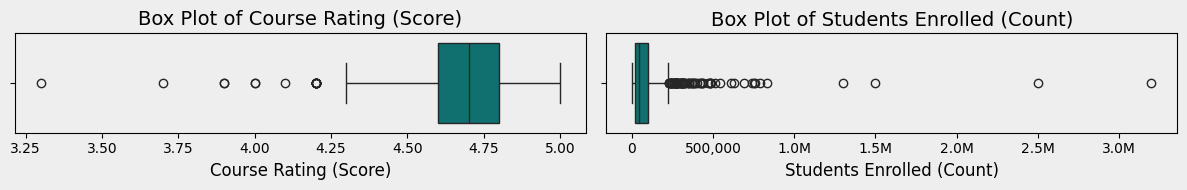

--- IQR Outlier Detection Summary ---

course_rating:
  Lower Bound: 4.30
  Upper Bound: 5.10
  Total Outliers: 17

course_students_enrolled:
  Lower Bound: -105,500.00
  Upper Bound: 222,500.00
  Total Outliers: 78


In [21]:
numerical_cols = ['course_rating', 'course_students_enrolled']

title_map = {
    'course_rating': 'Course Rating (Score)',
    'course_students_enrolled': 'Students Enrolled (Count)'
}

plt.figure(figsize=(12, 2), facecolor='#eeeeee')

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(1, 2, i + 1)

    ax.set_facecolor('#eeeeee')

    sns.boxplot(x=df[col].dropna(), color='teal')

    friendly_title = title_map.get(col, col)
    plt.title(f'Box Plot of {friendly_title}', fontsize=14)
    plt.xlabel(friendly_title, fontsize=12)
    plt.ylabel('')

    if col == 'course_students_enrolled':
        ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


results = {}

for col in numerical_cols:
    data = df[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

    results[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outliers_count
    }

print("--- IQR Outlier Detection Summary ---")
for col, res in results.items():
    print(f"\n{col}:")
    print(f"  Lower Bound: {res['Lower Bound']:,.2f}")
    print(f"  Upper Bound: {res['Upper Bound']:,.2f}")
    print(f"  Total Outliers: {res['Outliers Count']}")

**Outlier analysis in numerical columns:**

**Course Rating:**
- Median is at approx. **4.65**. The central rating is very high, suggesting that most courses are highly rated.
- Interquartile Range (IQR) Box is narrow **(4.5 - 4.75)**. The ratings are highly consistent and tightly clustered around the median.
- **Total Outliers - 17**. The outliers are exclusively lower-rated courses. Any course with a rating below **4.30** is considered unusually low compared to the majority.
- **Summary:** The platform demonstrates high perceived course quality with minimal variation in ratings.

**Number of Students Enrolled:**
- **Median is very low**: the vast majority of courses have a relatively small number of enrolled students.
- Interquartile Range (IQR) Box is **extremely narrow**. The distribution is heavily skewed to the right. Most data points are compressed near the minimum enrollment.
- **Total Outliers - 78**, with Upper Bound of 222,500 students enrolled. All 78 outliers are high-enrollment courses (some with over 3.0M students). The Lower Bound is negative and irrelevant for counts.
- **Key Finding:** there's a major distinction between the bulk of courses (low enrollment) and a small, highly popular set of courses (high enrollment).

* **Treemap presenting Top 20 organizations by number of courses:**

In [22]:
organization_counts = df['course_organization'].value_counts().reset_index()
organization_counts.columns = ['course_organization', 'Count']
organization_counts['All Courses'] = 'Total'

top_20_organization_counts = organization_counts.head(20)

fig = px.treemap(
    top_20_organization_counts,
    path=['All Courses', 'course_organization', 'Count'],
    values='Count',
    color='Count',
    title='Top 20 Organizations by Course Count',
    color_continuous_scale='Teal'
)

fig.update_layout(
    margin = dict(t=25, l=25, r=25, b=25)
)

fig.update_traces(
    textinfo="label",
    texttemplate='<b>%{label}</b>',
    marker_line_width=0,
    marker_line_color='white'
)

fig.update_coloraxes(
    colorbar_title='Courses'
)

fig.show()

* **Set style for all Seaborn plots:**

In [23]:
sns.set_theme(
    style="whitegrid",
    rc={
        "figure.figsize": (12, 5),
        "axes.edgecolor": "#eeeeee",
        "axes.facecolor": "#eeeeee",
        "grid.color": "white",
        "font.family": "sans-serif"
    }
)

sns.despine(top=True, right=True)

<Figure size 1200x500 with 0 Axes>

* **Distribution of ratings across courses:**

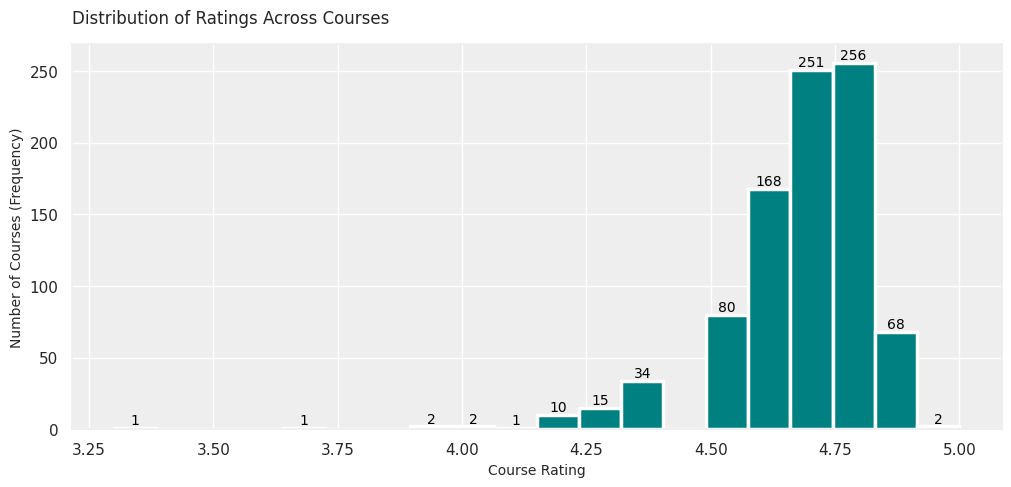

In [24]:
fig, ax = plt.subplots()

sns.histplot(
    data=df,
    x='course_rating',
    bins=20,
    color='#008080',
    kde=False,
    alpha=1.0,
    edgecolor='white',
    linewidth=2.5,
    ax=ax
)

for p in ax.patches:
    height = p.get_height()

    if height > 0:
      value_text = f'{height:.0f}'

      ax.text(
          p.get_x() + p.get_width() / 2.,
          height + 0.01,
          value_text,
          ha='center',
          va='bottom',
          fontsize=10,
          color='black',
          fontweight='regular'
      )

plt.title(
    'Distribution of Ratings Across Courses',
    fontsize=12,
    loc='left',
    pad=15
)
plt.xlabel('Course Rating', fontsize=10)
plt.ylabel('Number of Courses (Frequency)', fontsize=10)

plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.grid(axis='x', color='white', linestyle='-', linewidth=1)

plt.show()

**Course Ratings:**

The majority of courses have very high ratings of 4.8 (256 courses) and 4.7 (251 courses).

* **Format display of millions in graphs:**

In [25]:
def mln_formatter(x):
    if abs(x) >= 1000000:
        return f'{x / 1000000:1.1f}M'

    return f'{x:,.0f}'

* **Treemap of Top 20 Organizations by the Number of Students:**

In [26]:
org_enrollment_data = df.groupby('course_organization')['course_students_enrolled'].sum().reset_index()
org_enrollment_data.columns = ['course_organization', 'Total_Enrollment']

top_orgs = org_enrollment_data.nlargest(20, 'Total_Enrollment')['course_organization']
org_enrollment_data = org_enrollment_data[org_enrollment_data['course_organization'].isin(top_orgs)]

org_enrollment_data['Formatted_Enrollment'] = org_enrollment_data['Total_Enrollment'].apply(mln_formatter)

fig = px.treemap(
    org_enrollment_data,
    path=['course_organization', 'Formatted_Enrollment'],
    values='Total_Enrollment',
    color='Total_Enrollment',
    color_continuous_scale='Teal',
    title='Number of Enrolled Students by Organization (Top 20)'
)

fig.update_traces(
    textinfo="label",
    texttemplate='<b>%{label}</b>',
    marker_line_width=0,
    marker_line_color='white'
)

fig.update_layout(
    margin=dict(t=25, l=25, r=25, b=25))

fig.update_coloraxes(
    colorbar_title='Student Count'
)

fig.show()

* **Treemap of Top 10 Courses by the Number of Students:**

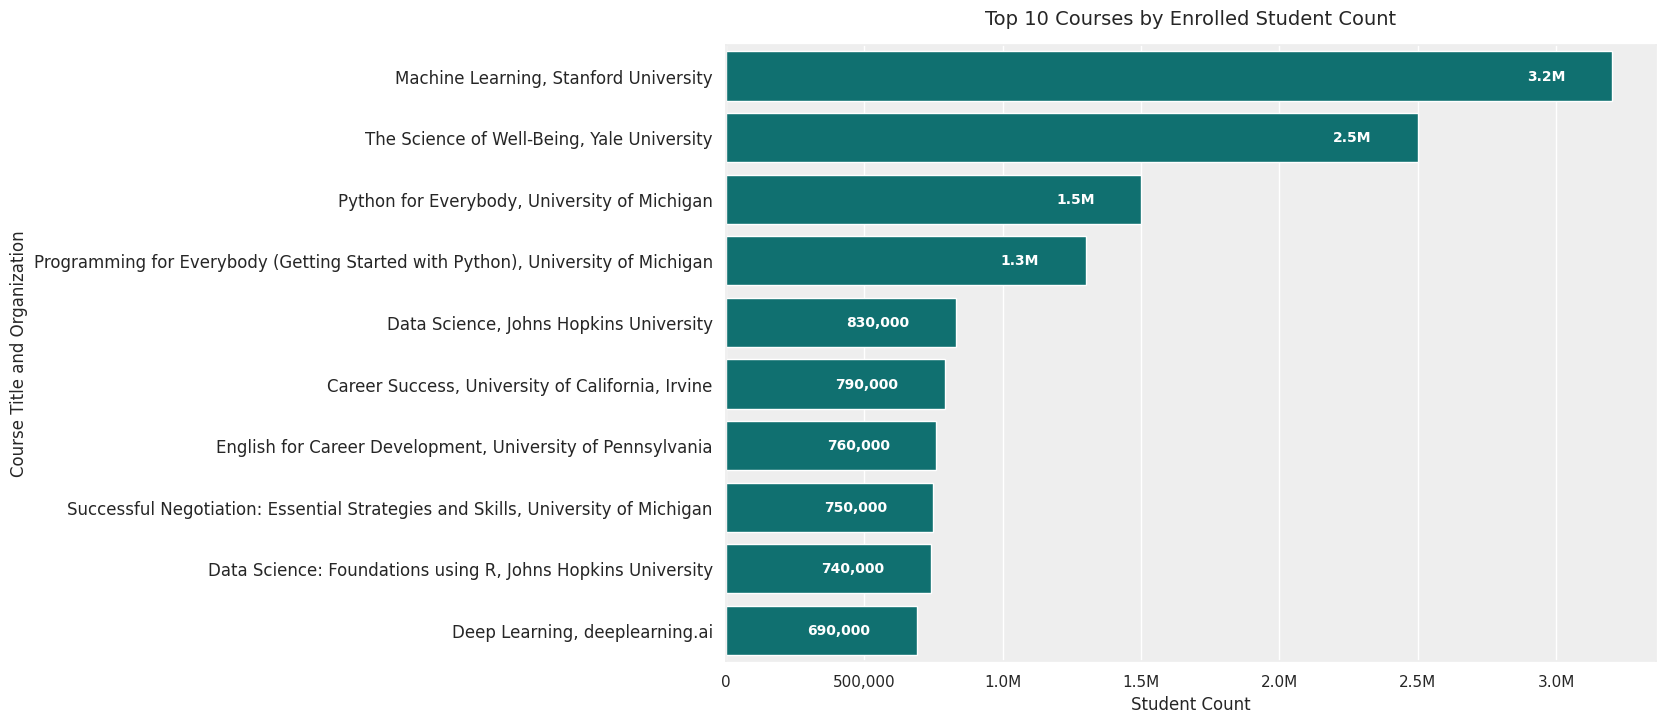

In [27]:
course_enrollment_data = df.groupby(['course_title', 'course_organization'])['course_students_enrolled'].sum().reset_index()
course_enrollment_data.columns = ['course_title', 'course_organization', 'Total_Enrollment']

course_enrollment_data = course_enrollment_data.nlargest(10, 'Total_Enrollment').reset_index(drop=True)

course_enrollment_data['Course_and_Org'] = (
    course_enrollment_data['course_title'] + ', ' + course_enrollment_data['course_organization']
)

df_sorted = course_enrollment_data.sort_values(by='Total_Enrollment', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=df_sorted,
    x='Total_Enrollment',
    y='Course_and_Org',
    color='#008080',
    alpha=1.0,
    edgecolor='white',
    linewidth=1,
    ax=ax
)

ax.xaxis.set_major_formatter(formatter)

for p in ax.patches:
    raw_value = p.get_width()
    value_text = mln_formatter(raw_value)

    ax.text(
        raw_value - ax.get_xlim()[-1] * 0.05,
        p.get_y() + p.get_height() / 2,

        value_text,
        ha='right',
        va='center',
        fontsize=10,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Courses by Enrolled Student Count', fontsize=14, pad=15)
plt.xlabel('Student Count', fontsize=12)
plt.ylabel('Course Title and Organization', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

**The most popular study fields include:** programming languages (Python, R), machine learning, data science, English language, Bussiness and Finance, Career development.

* **Distribution of enrolled students by course difficulty:**

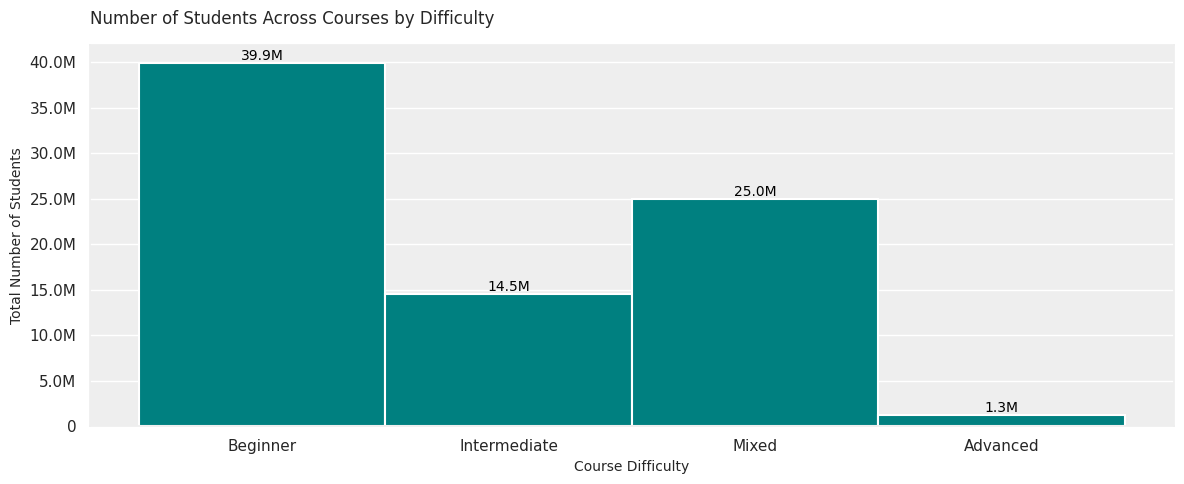

In [28]:
fig, ax = plt.subplots()

sns.histplot(
    data=df,
    x='course_difficulty',
    weights='course_students_enrolled',
    bins=5,
    color='#008080',
    kde=False,
    alpha=1.0,
    edgecolor='white',
    linewidth=1.5,
    ax=ax
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

for p in ax.patches:
    height = p.get_height()

    value_text = mln_formatter(height)

    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        value_text,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='regular'
    )

plt.title(
    'Number of Students Across Courses by Difficulty',
    fontsize=12,
    loc='left',
    pad=15
)
plt.xlabel('Course Difficulty', fontsize=10)
plt.ylabel('Total Number of Students', fontsize=10)

plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.grid(axis='x', color='white', linestyle='', linewidth=0)

plt.tight_layout()
plt.show()

The most popular are courses dedicated to **Beginner level** students.

* **Distribution of enrolled students by course certificate type:**

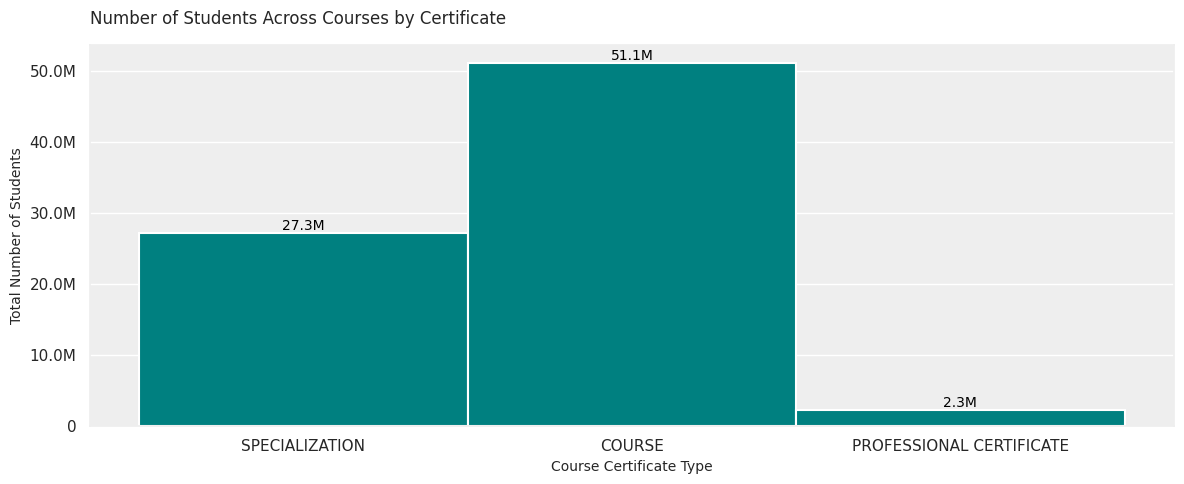

In [29]:
fig, ax = plt.subplots()

sns.histplot(
    data=df,
    x='course_Certificate_type',
    weights='course_students_enrolled',
    bins=5,
    color='#008080',
    kde=False,
    alpha=1.0,
    edgecolor='white',
    linewidth=1.5,
    ax=ax
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

for p in ax.patches:
    height = p.get_height()

    value_text = mln_formatter(height)

    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        value_text,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='regular'
    )

plt.title(
    'Number of Students Across Courses by Certificate',
    fontsize=12,
    loc='left',
    pad=15
)
plt.xlabel('Course Certificate Type', fontsize=10)
plt.ylabel('Total Number of Students', fontsize=10)

plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.grid(axis='x', color='white', linestyle='', linewidth=0)

plt.tight_layout()
plt.show()

The most common certificate type is **Course**.

* **Proportion of Course Difficulty types in each Certificate Type available:**

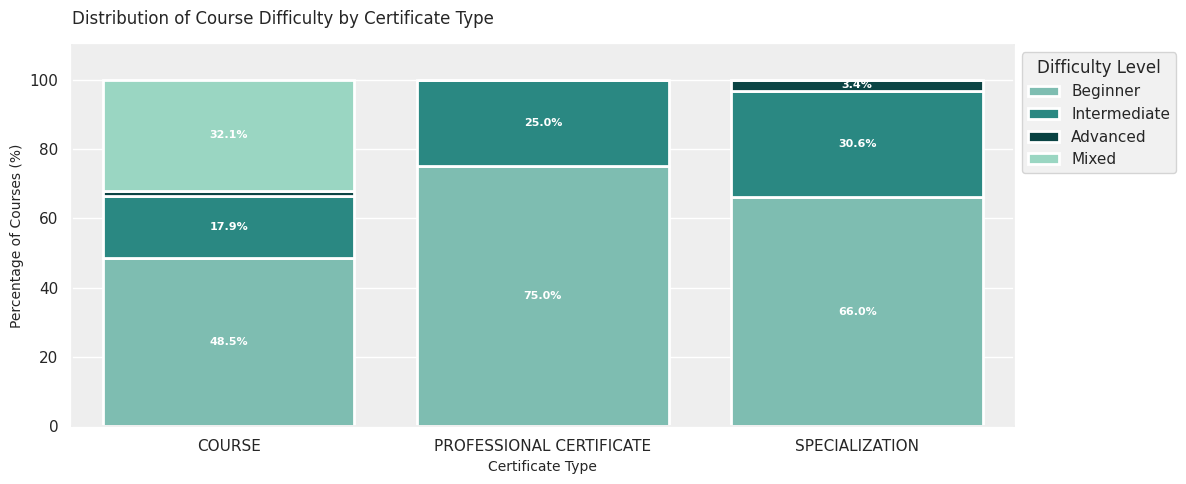

In [30]:
crosstab_norm = pd.crosstab(df['course_Certificate_type'], df['course_difficulty'], normalize='index').mul(100).round(1)
df_plot = crosstab_norm.reset_index().rename_axis(None, axis=1)

all_difficulty_levels = df['course_difficulty'].unique()
preferred_order = ['Beginner', 'Intermediate', 'Advanced', 'Mixed']
difficulty_order = [d for d in preferred_order if d in all_difficulty_levels]
for d in all_difficulty_levels:
    if d not in difficulty_order:
        difficulty_order.append(d)

df_melted = df_plot.melt(
    id_vars=['course_Certificate_type'],
    value_vars=difficulty_order,
    var_name='Course Difficulty',
    value_name='Percentage'
)

color_map = {
    'Beginner': '#74c7b8',
    'Intermediate': '#1a9890',
    'Advanced': '#014d4e',
    'Mixed': '#90e0c5'
}
plot_colors = [color_map[d] for d in difficulty_order if d in color_map]

fig, ax = plt.subplots()

bottom = np.zeros(len(df_plot))

for i, level in enumerate(difficulty_order):
    if level in df_melted['Course Difficulty'].unique():

        subset = df_melted[df_melted['Course Difficulty'] == level]

        sns.barplot(
            data=subset,
            x='course_Certificate_type',
            y='Percentage',
            ax=ax,
            color=plot_colors[i],
            label=level,
            bottom=bottom,
            edgecolor='white',
            linewidth=2,
            alpha=1.0
        )

        bottom += subset['Percentage'].values

        for j, p in enumerate(ax.patches[-len(subset):]):
            h = p.get_height()
            w = p.get_width()
            x = p.get_x()
            y = p.get_y()

            percentage = subset['Percentage'].iloc[j]
            if percentage > 2:
                ax.text(
                    x + w / 2.,
                    y + h / 2.,
                    f'{percentage:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=8,
                    color='white',
                    fontweight='bold'
                )

ax.set_ylim(0, 110)

ax.set_title(
    'Distribution of Course Difficulty by Certificate Type',
    fontsize=12,
    loc='left',
    pad=15
)
ax.set_xlabel('Certificate Type', fontsize=10)
ax.set_ylabel('Percentage of Courses (%)', fontsize=10)

ax.legend(
    title='Difficulty Level',
    loc='upper right',
    bbox_to_anchor=(1.18, 1.0)
)

ax.grid(axis='y', color='white', linestyle='-', linewidth=1)
ax.grid(axis='x', color='white', linestyle='-', linewidth=0)

plt.tight_layout(rect=[0, 0, 1.0, 1.0])
plt.show()

* **Average Course Rating by Course Difficulty:**

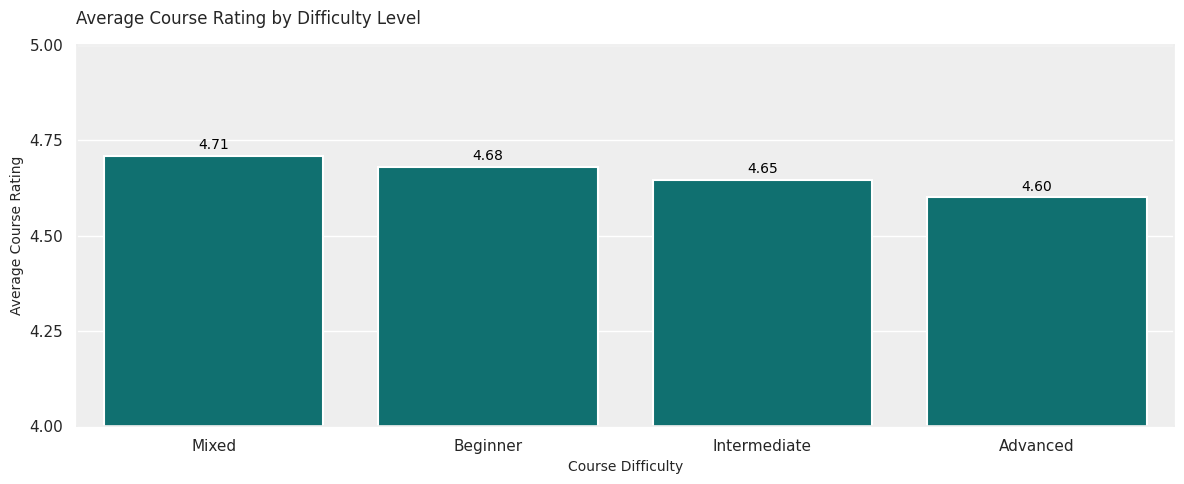

In [31]:
rating_by_difficulty = df.groupby('course_difficulty')['course_rating'].mean().reset_index()
rating_by_difficulty = rating_by_difficulty.sort_values(by='course_rating', ascending=False)

rating_by_difficulty.columns = ['Course Difficulty', 'Average Course Rating']

fig, ax = plt.subplots()

sns.barplot(
    data=rating_by_difficulty,
    x='Course Difficulty',
    y='Average Course Rating',
    errorbar=None,
    color='#008080',
    alpha=1.0,
    edgecolor='white',
    linewidth=1.5,
    ax=ax
)

for p in ax.patches:
    height = p.get_height()

    value_text = f'{height:.2f}'

    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        value_text,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='regular'
    )

ax.set_ylim(4.0, 5.0)
ax.set_yticks([4.0, 4.25, 4.5, 4.75, 5.0])

plt.title('Average Course Rating by Difficulty Level', fontsize=12, loc='left', pad=15)
plt.xlabel('Course Difficulty', fontsize=10)
plt.ylabel('Average Course Rating', fontsize=10)

plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.grid(axis='x', color='white', linestyle='', linewidth=0)

plt.tight_layout()
plt.show()

* Entry level courses (Begginer, Mixed) have higher average ratings than more advanced courses (Intermediate, Advanced).

* **Barplot of organizations with highest average course ratings (>= 4.8):**

In [32]:
organization_ratings = df.groupby('course_organization')['course_rating'].mean().reset_index()
organization_ratings.columns = ['Course Organization', 'Average Course Rating']

df_ratings_sorted = organization_ratings[
    organization_ratings['Average Course Rating'] >= 4.8
].sort_values(by='Average Course Rating', ascending=False)

fig = px.bar(
    df_ratings_sorted,
    x='Average Course Rating',
    y='Course Organization',
    color='Average Course Rating',
    color_continuous_scale='Teal',
    category_orders={'Course Organization': df_ratings_sorted['Course Organization'].tolist()},
    title='Organizations with Average Course Ratings ≥ 4.8',
    orientation='h'
)

fig.update_traces(
    texttemplate='%{x:.3f}',
    textposition='inside',
    insidetextanchor='middle',
    insidetextfont={'color': 'white'}
)

fig.update_layout(
    xaxis_title='Average Course Rating',
    yaxis_title='Course Organization',
    margin=dict(l=10, r=10, t=40, b=10),
    xaxis_range=[4.75, df_ratings_sorted['Average Course Rating'].max() * 1.005],
)

fig.update_coloraxes(
    colorbar_title='AVG Rating'
)

fig.show()

**Barplot Observations:**

- There are **34 organizations** with Average Course Rating equal to or higher than 4.8.
- Comparison with other plots presents that organizations with less courses tend to have higher average ratings than those with multiple courses.

* **Correlation between Course Rating and Number of Student Enrolled (Including Outliers):**

In [33]:
correlation = df['course_rating'].corr(df['course_students_enrolled'], method='spearman')

fig = px.scatter(
    df,
    x='course_students_enrolled',
    y='course_rating',
    color='course_difficulty',
    opacity=0.6,
    log_x=True,
    title='Course Rating vs. Students Enrolled (Including Outliers)'
)

annotation_text = (f'Spearman Correlation: {correlation:.4f}')

fig.update_layout(
    xaxis_title='Students Enrolled (Log Scale)',
    yaxis_title='Course Rating',
    plot_bgcolor='#eeeeee',
    height=550,
    xaxis=dict(
        tickvals=[1000, 10000, 100000, 1000000],
        ticktext=['1k', '10k', '100k', '1M'],
        type='log'
    )
)

fig.show()

print(f"The Spearman correlation is: {correlation:.4f}")


The Spearman correlation is: 0.0268


**Analysis:**

* A Spearman correlation coefficient of **0.0268** is extremely close to zero, which means there is no statistically significant monotonic relationship between course rating and the number of students enrolled.

* A course's success (high enrollment) does not reliably predict its quality (high rating), and vice versa. Very popular courses aren't necessarily rated higher than less popular ones.

* **Correlation between Course Rating and Number of Student Enrolled (Excluding Outliers):**

In [34]:
RATING_LOWER = 4.30
ENROLLMENT_UPPER = 222500

valid_ratings = (df['course_rating'] >= RATING_LOWER)
valid_enrollment = (df['course_students_enrolled'] <= ENROLLMENT_UPPER)

df_cleaned = df[valid_ratings & valid_enrollment].copy()

print(f"Original Data Size: {len(df)}")
print(f"Cleaned Data Size: {len(df_cleaned)} (Removed {len(df) - len(df_cleaned)} rows)")

corr_cleaned_spearman = df_cleaned['course_rating'].corr(df_cleaned['course_students_enrolled'], method='spearman')


fig = px.scatter(
    df_cleaned,
    x='course_students_enrolled',
    y='course_rating',
    color='course_difficulty',
    opacity=0.7,
    log_x=True,
    title='Course Rating vs. Students Enrolled (Outliers Removed)'
)

annotation_text = (f'Spearman Correlation: {corr_cleaned_spearman:.4f}')

fig.update_layout(
    xaxis_title='Students Enrolled (Log Scale)',
    yaxis_title='Course Rating',
    plot_bgcolor='#eeeeee',
    height=550,
    xaxis=dict(
        tickvals=[100, 1000, 10000, 100000],
        ticktext=['100', '1k', '10k', '100k'],
        type='log'
    )
)

fig.show()

print(f"The Spearman correlation is: {corr_cleaned_spearman:.4f}")


Original Data Size: 891
Cleaned Data Size: 797 (Removed 94 rows)


The Spearman correlation is: 0.0038


**Analysis:**

* Very low Spearman correlation coefficient **0.0038** confirms that for the vast majority of courses, the popularity of a course (enrollment) is completely independent of its perceived quality (rating).

* The initial Spearman coefficient (0.0268) was slightly higher entirely due to the 94 removed outliers.

Since there were 95 outliers in total, but the cleaning steps removed 94 rows of data, that means that 1 row was outlier both in rating and in number of students enrolled.

In [35]:
rating_outlier_mask = (df['course_rating'] < RATING_LOWER)
enrollment_outlier_mask = (df['course_students_enrolled'] > ENROLLMENT_UPPER) | (df['course_students_enrolled'] < 0)

overlapping_outlier = df[rating_outlier_mask & enrollment_outlier_mask]
print(overlapping_outlier)


                         course_title course_organization  \
590  Mastering Data Analysis in Excel     Duke University   

    course_Certificate_type  course_rating course_difficulty  \
590                  COURSE            4.2             Mixed   

     course_students_enrolled  
590                    280000  


## 📝 Conclusions and Further Improvements

* This exploratory data analysis of the Coursera dataset reveals a platform characterized by exceptionally high and consistent course quality coupled with a highly stratified enrollment structure.

* The key takeaway is the confirmed decoupling of quality and popularity: high course ratings do not correlate with high student enrollment.

* The top-enrolled courses (like "Machine Learning" and "The Science of Well-Being") serve as highly visible entry points, while the majority of high-quality content remains relatively niche.

* The platform is dominated by "Beginner" level courses, aligning with its role in foundational skill acquisition across popular fields like programming and data science.

* Further analysis can be applied to selected course organizations or study fields to find valuable insights on the quality and popularity of particular courses within organizations or areas where new courses can be introduced to fill in the gaps in learning material.

* Course organizations could invest into developing more "Intermediate" and "Advanced" level courses to attract more specified audiences or return students from "Beginner" level courses to continue learning with the organization.